In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [2]:
model = load_model("../models/emotion_model.h5")
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,697,033 (10.29 MB)

 Trainable params: 439,047 (1.67 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)

In [3]:
for layer in model.layers[:-4]:
    layer.trainable = False

In [4]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '../fer2013/train',
    target_size=(224,224),
    batch_size=64,
    color_mode='rgb',
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '../fer2013/train',
    target_size=(224,224),
    batch_size=64,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation'
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [7]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=7
)

Epoch 1/7
359/359 ━━━━━━━━━━━━━━━━━━━━ 491s 1s/step - accuracy: 0.2789 - loss: 21.0033 - val_accuracy: 0.3438 - val_loss: 13.1121
Epoch 2/7
359/359 ━━━━━━━━━━━━━━━━━━━━ 463s 1s/step - accuracy: 0.3383 - loss: 16.4260 - val_accuracy: 0.3832 - val_loss: 11.2136
Epoch 3/7
359/359 ━━━━━━━━━━━━━━━━━━━━ 454s 1s/step - accuracy: 0.3658 - loss: 14.4970 - val_accuracy: 0.4132 - val_loss: 9.9064
Epoch 4/7
359/359 ━━━━━━━━━━━━━━━━━━━━ 425s 1s/step - accuracy: 0.3819 - loss: 13.4637 - val_accuracy: 0.4330 - val_loss: 9.2884
Epoch 5/7
359/359 ━━━━━━━━━━━━━━━━━━━━ 403s 1s/step - accuracy: 0.4005 - loss: 12.4713 - val_accuracy: 0.4426 - val_loss: 8.9495
Epoch 6/7
359/359 ━━━━━━━━━━━━━━━━━━━━ 394s 1s/step - accuracy: 0.4164 - loss: 11.7092 - val_accuracy: 0.4548 - val_loss: 8.4686
Epoch 7/7
359/359 ━━━━━━━━━━━━━━━━━━━━ 397s 1s/step - accuracy: 0.4290 - loss: 11.0573 - val_accuracy: 0.4588 - val_loss: 7.9363


In [8]:
model.save("../models/emotion_model_finetuned.h5")

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '../fer2013/test',
    target_size=(224,224),
    batch_size=64,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)

print("FER Test Accuracy:", test_accuracy)

Found 7178 images belonging to 7 classes.
113/113 ━━━━━━━━━━━━━━━━━━━━ 99s 876ms/step - accuracy: 0.4733 - loss: 7.5877
FER Test Accuracy: 0.473251610994339


In [10]:
raf_test_datagen = ImageDataGenerator(rescale=1./255)

raf_test_generator = raf_test_datagen.flow_from_directory(
    '../data/raf-db/test',
    target_size=(224,224),
    batch_size=64,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

raf_test_loss, raf_test_accuracy = model.evaluate(raf_test_generator)

print("RAF-DB Test Accuracy:", raf_test_accuracy)

Found 3068 images belonging to 7 classes.
48/48 ━━━━━━━━━━━━━━━━━━━━ 40s 832ms/step - accuracy: 0.4697 - loss: 12.8705
RAF-DB Test Accuracy: 0.4696871042251587


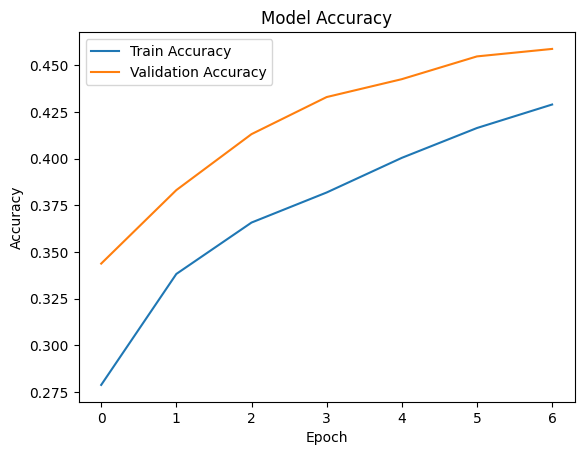

In [11]:
#Plot Training Graphs (VERY IMPORTANT)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

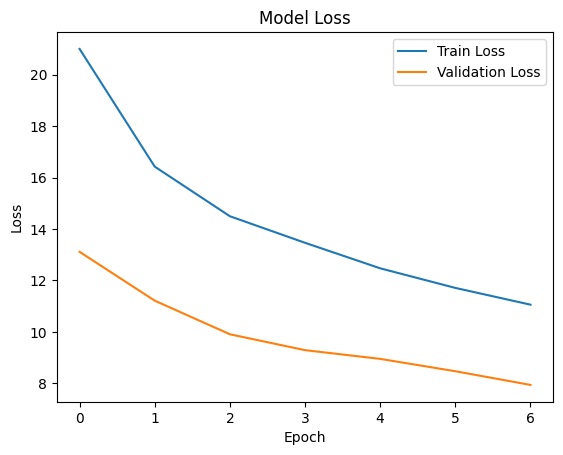

In [12]:
#Plot Loss Graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

113/113 ━━━━━━━━━━━━━━━━━━━━ 103s 893ms/step


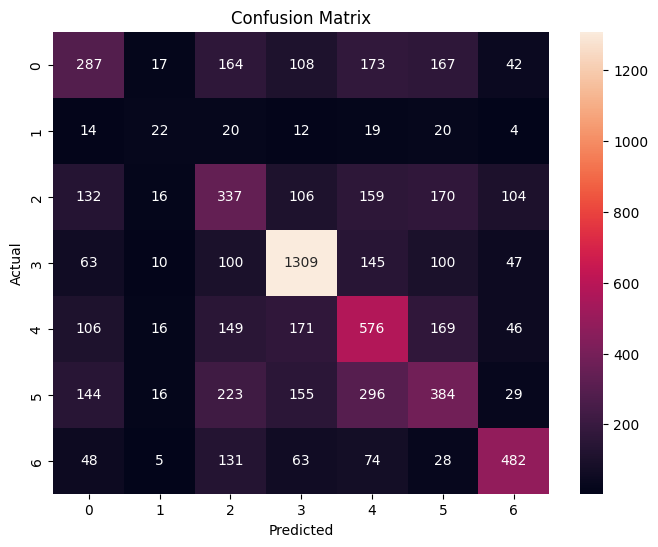

In [15]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
!pip install streamlit

   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.1 MB 1.9 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/9.1 MB 1.9 MB/s eta 0:00:05
   ------ --------------------------------- 1.6/9.1 MB 2.1 MB/s eta 0:00:04
   --------- ------------------------------ 2.1/9.1 MB 2.3 MB/s eta 0:00:04
   ------------ --------------------------- 2.9/9.1 MB 2.5 MB/s eta 0:00:03
   -------------- ------------------------- 3.4/9.1 MB 2.6 MB/s eta 0:00:03
   ------------------ --------------------- 4.2/9.1 MB 2.8 MB/s eta 0:00:02
   ------------------- -------------------- 4.5/9.1 MB 2.7 MB/s eta 0:00:02
   --------------------- ------------------ 5.0/9.1 MB 2.6 MB/s eta 0:00:02
   ------------------------ --------------- 5.5/9.1 MB 2.5 MB/s eta 0:00:02
   -------------------------- ------------- 6.0/9.1 MB 2.5 MB/s eta 0:00:02
   -----------------------